https://www.kaggle.com/jmy666/using-decision-tree-to-predict-survival

In [0]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/SESCDS/sescds/master/Lesson3/train.csv')
test = pd.read_csv("https://raw.githubusercontent.com/SESCDS/sescds/master/Lesson3/test.csv")

In [0]:
train_p = train.drop(["Cabin","PassengerId","Ticket","Name","Embarked","Fare"],axis=1)
test_p = test.drop(["Cabin","PassengerId","Ticket","Name","Embarked","Fare"],axis=1)

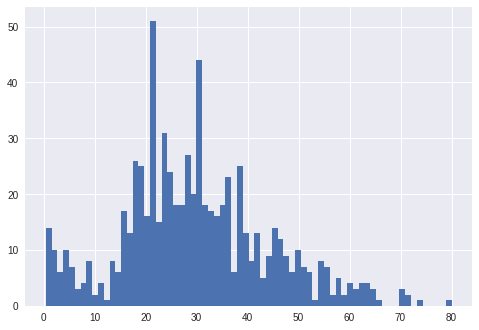

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


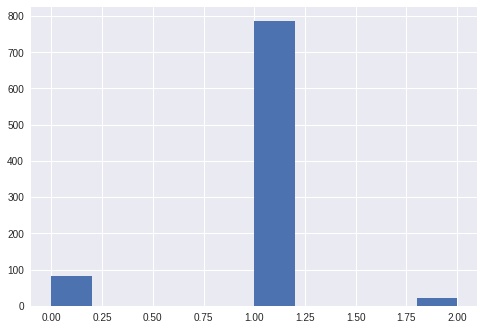

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Age_new     891 non-null int64
Family      891 non-null int64
Gender      891 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 48.8+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


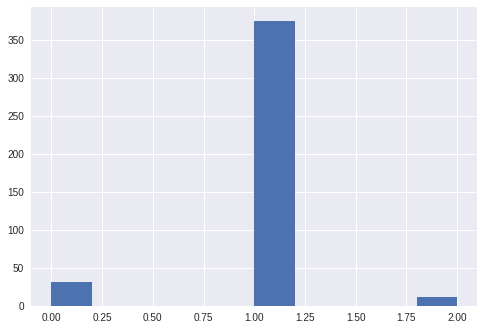

In [19]:
train_p['Age'].dropna().hist(bins=70)
plt.show()

train_p['Age_new'] = 1
train_p['Age_new'][train_p["Age"]<16] = 0
train_p['Age_new'][train_p["Age"]>60] = 2
train_p['Age_new']=train_p['Age_new'].astype(int)
train_p['Age_new'].hist()
plt.show()        
train_p.info()

test_p['Age_new'] = 1
test_p['Age_new'][test_p["Age"]<16] = 0
test_p['Age_new'][test_p["Age"]>60] = 2
test_p['Age_new']=test_p['Age_new'].astype(int)
test_p['Age_new'].hist()
plt.show()

In [8]:
train_p['Family'] =  train_p["Parch"] + train_p["SibSp"]
train_p['Family'].loc[train_p['Family'] > 0] = 1
train_p['Family'].loc[train_p['Family'] == 0] = 0

test_p['Family'] =  test_p["Parch"] + test_p["SibSp"]
test_p['Family'].loc[test_p['Family'] > 0] = 1
test_p['Family'].loc[test_p['Family'] == 0] = 0


# drop Parch & SibSp
train_p = train_p.drop(['SibSp','Parch'], axis=1)
test_p    = test_p.drop(['SibSp','Parch'], axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
#gender
#male is 1
train_p['Gender'] = 0
train_p['Gender'][train_p['Sex']=="male"] = 1

test_p['Gender'] = 0
test_p['Gender'][test_p['Sex']=="male"] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
train_y = train_p['Survived']
train_x = train_p.drop(['Survived','Age',"Sex"],axis=1)

test_x = test_p.drop(['Age','Sex'],axis=1)

In [11]:
model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(train_x, train_y)

print(model_tree.feature_importances_)
print(model_tree.score(train_x, train_y))

[0.24949133 0.08455378 0.01735779 0.6485971 ]
0.8159371492704826


In [0]:
a = model_tree.predict(test_x)

test_x["Survived"] = a

In [0]:
submission_data = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':test_x['Survived']})

submission_data.to_csv("submission_data.csv",index=0)

In [0]:
!pip install pydotplus

In [0]:
!apt-get install graphviz -y

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

In [0]:
export_graphviz(model_tree, out_file=dot_data,
                feature_names=train_x.columns,
                filled=True, rounded=True,
                special_characters=True)

In [0]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

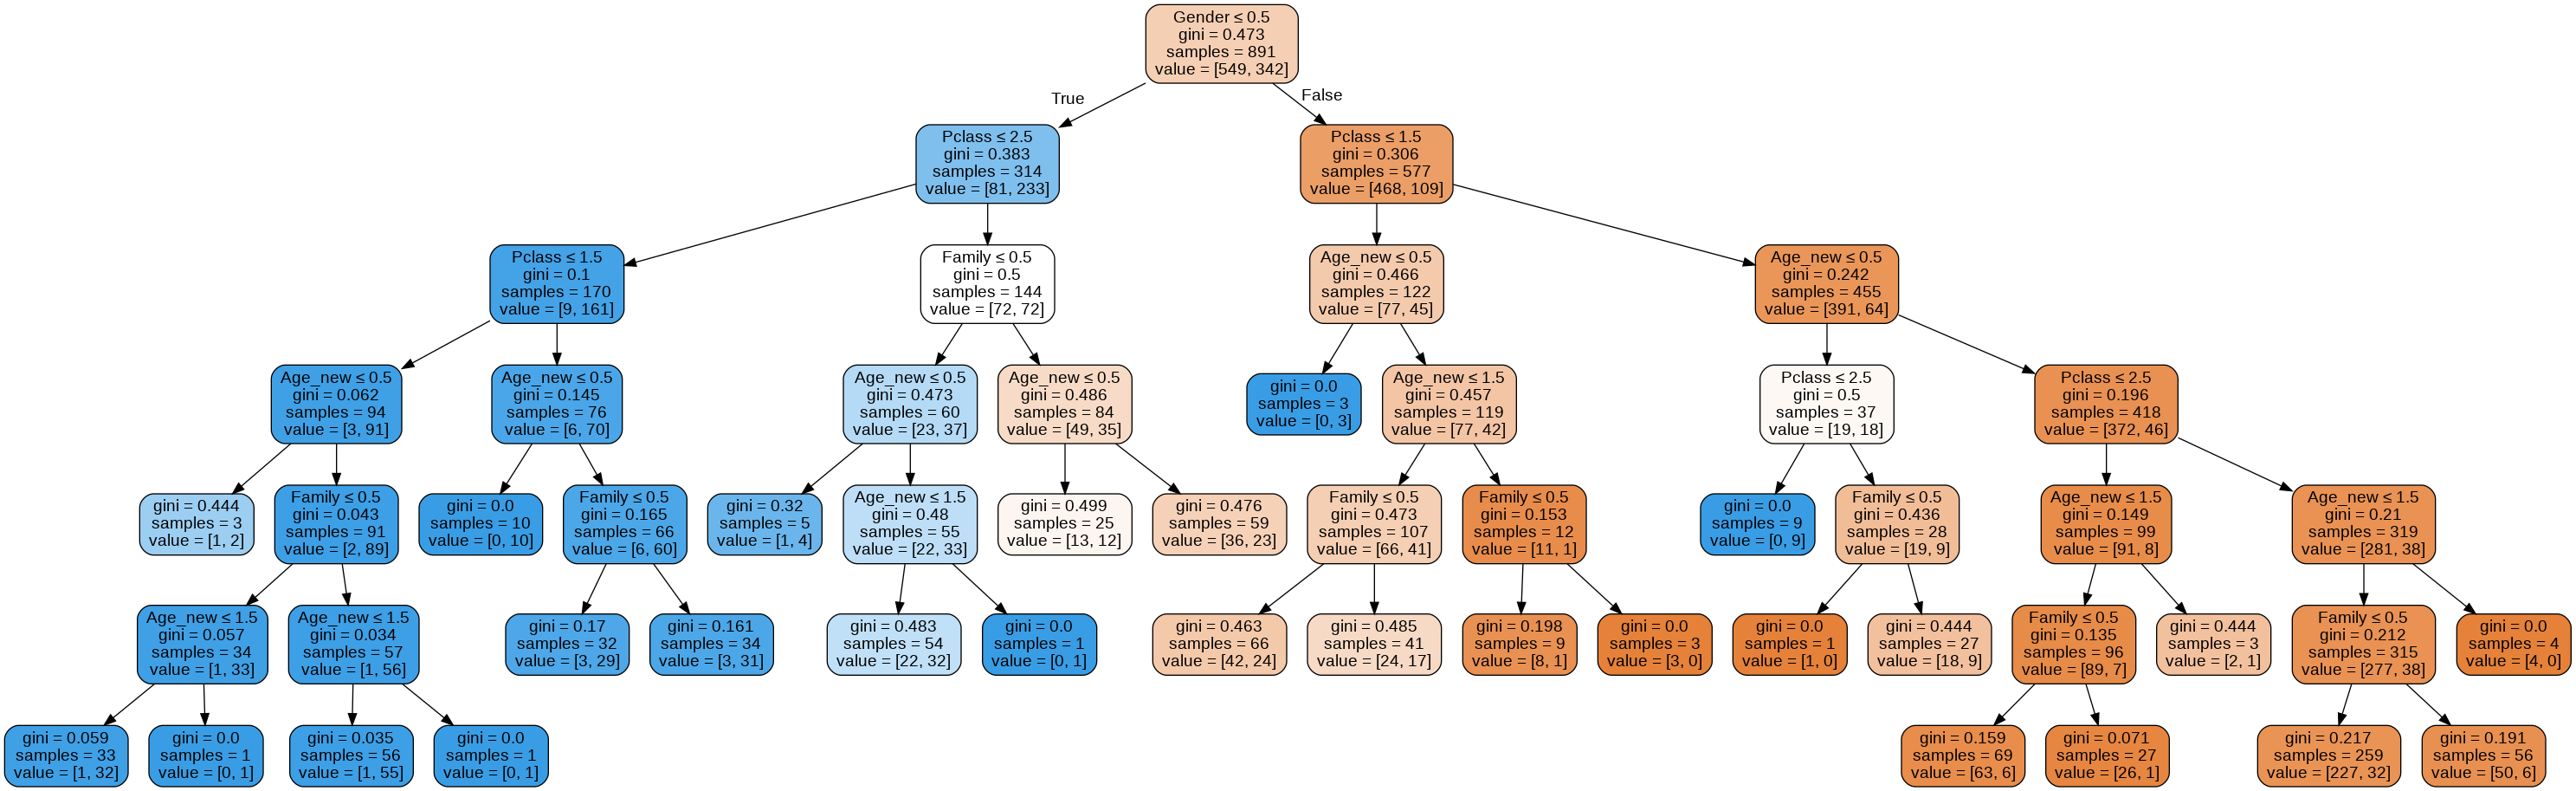

In [17]:
Image(graph.create_png())